# Time Series Analysis

## Introduction to the Python `datetime` tools
The [`datetime`](https://docs.python.org/2/library/datetime.html) module in Python stores date and time to the microsecond.  Here's an example taking a look at the current time with [`datetime.now()`](https://docs.python.org/2/library/datetime.html#datetime.datetime.now):

In [2]:
# Import the module datetime
from datetime import datetime
# Create a datetime called now with the current date/time
now = datetime.now()
# Print it out
now

datetime.datetime(2016, 1, 8, 12, 47, 11, 333149)

In [3]:
# Printing the year, month, day
print 'Year: {0}\nMonth: {1}\nDay: {2}'.format(now.year, now.month, now.day)

Year: 2016
Month: 1
Day: 8


You can also easily work with differences in datetimes with the [`timedelta`](https://docs.python.org/2/library/datetime.html#datetime.timedelta) object:

In [4]:
from datetime import timedelta
# Calculating the difference between 2 datetimes
delta = datetime(2016, 1, 8) - datetime(2015, 1, 8, 8, 15)
delta

datetime.timedelta(364, 56700)

In [5]:
# Printing the time period days and seconds
print '{0} Days, {1} Seconds'.format(delta.days, delta.seconds)

364 Days, 56700 Seconds


In [6]:
# Adding 12 days to a datetime with timedelta
start = datetime(2000, 1, 1)
start + timedelta(days=12)

datetime.datetime(2000, 1, 13, 0, 0)

In [7]:
# Subtracting 24 days from a datetime
start - 2 * timedelta(12)

datetime.datetime(1999, 12, 8, 0, 0)

### Formatting `datetimes` as Strings
You can print out datetimes in basically whatever human-readable format you like with handy methods like the following:

In [8]:
# Print out with default format
stamp = datetime.now()
str(stamp)

'2016-01-08 12:47:11.429651'

In [9]:
# Print out with custom format
stamp.strftime('%m/%d/%Y at %H:%M:%S')

'01/08/2016 at 12:47:11'

### Parsing Strings into `datetimes`
You can convert string representations into `datetime` objects in a couple ways.  The simplest if you know the parsing format is to use `datetime.strptime()` like so:

In [10]:
# Specify a date in a known format
value = '2000-01-01'
# Call the date parsing function with the date string and corresponding known format
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2000, 1, 1, 0, 0)

For more complex parsing, you can try the `parser.parse()` in the [`dateutil`](https://pypi.python.org/pypi/python-dateutil) package.  It will try to smartly parse arbitrary date strings for you:

In [11]:
# Import the parser
from dateutil.parser import parse
# Parse various dates
print parse('2000-01-01')
print parse('Aug 8 2015 6:45 PM')
print parse('6/12/2000', dayfirst = True)

2000-01-01 00:00:00
2015-08-08 18:45:00
2000-12-06 00:00:00


## Integrating `datetime` tools with Pandas for Time Series
#### The `DatetimeIndex`
Pandas has a lot of great convenience methods for working with datetime data.  When we're dealing with time series data in Pandas, we generally are talking about data where each observation is indexed by a `datetime` (rather than the row index or column name index that we've mostly been using so far).  For this Pandas combines a nice [`DatetimeIndex`](http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.DatetimeIndex.html) object.

Here's an example of how we might instantiate such an object, by giving Pandas a list of dates as strings for the `to_datetime()` function:

In [12]:
# Import pandas
import pandas as pd
# Create list of date strings
list_of_dates = ['1/1/2000', '2/1/2000', '3/1/2000', '4/1/2000', '5/1/2000', '6/1/2000', '7/1/2000', '8/1/2000', '9/1/2000', '10/1/2000', '11/1/2000', '12/1/2000']
# Give the dates to Pandas and watch it create a a time-based index
pd.to_datetime(list_of_dates)

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01', '2000-11-01', '2000-12-01'],
              dtype='datetime64[ns]', freq=None)

Let's see what happens if we have a null (`None`) value in our list of dates:

In [13]:
# Give Pandas a list of dates with a null value
idx = pd.to_datetime(['1/1/2000', '2/1/2000'] + [None])

You'll notice that the index now contains an `NaT` entry for **"Not a Time"** as opposed to `NaN`.  The `pd.isnull()` function is still applicable with this type:

In [14]:
# Check for null index values
pd.isnull(idx)

array([False, False,  True], dtype=bool)

### Working with Pandas Series Indexed by Datetime
Here's where we start to see some of the benefits of Pandas, by indexing our `Series` objects (thus the row indices) by `DatetimeIndex` as is natural for time series data.

Let's create a series of 12 random datapoints, 1 for each month of the year, and index it by datetimes:

In [15]:
# Import numpy for random datapoints
import numpy as np
# Create a list of dates to use (12 months for our 12 datapoints)
list_of_dates = ['1/1/2000', '2/1/2000', '3/1/2000', '4/1/2000', '5/1/2000',\
                 '6/1/2000', '7/1/2000', '8/1/2000', '9/1/2000', '10/1/2000', '11/1/2000', '12/1/2000']
# Convert dates to DatetimeIndex with Pandas
dates = pd.to_datetime(list_of_dates)
# Create a Series of 12 random numbers indexed by those dates
time_series = pd.Series(np.random.randn(12), index=dates)
time_series

2000-01-01    0.192108
2000-02-01   -1.956171
2000-03-01   -1.007224
2000-04-01   -1.643680
2000-05-01   -0.078837
2000-06-01   -1.268350
2000-07-01    2.007980
2000-08-01    0.445029
2000-09-01   -1.098192
2000-10-01    0.426641
2000-11-01   -1.449946
2000-12-01   -1.188673
dtype: float64

Notice that the type of our `time_series` is `Series` and its index is the desired `DatetimeIndex`:

In [16]:
print type(time_series)
time_series.index

<class 'pandas.core.series.Series'>


DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01', '2000-11-01', '2000-12-01'],
              dtype='datetime64[ns]', freq=None)

##### All of the same index slicing works:

In [17]:
# Take the first 8 rows every other row
time_series[0:8:2]

2000-01-01    0.192108
2000-03-01   -1.007224
2000-05-01   -0.078837
2000-07-01    2.007980
dtype: float64

In [18]:
# Take every 3rd row
time_series[::3]

2000-01-01    0.192108
2000-04-01   -1.643680
2000-07-01    2.007980
2000-10-01    0.426641
dtype: float64

##### When arithmetic operations are performed between differently-indexed time series Pandas will automatically align on dates:

In [19]:
# Only every 3rd row will be non-null, as the 2nd series only has entries for that
time_series + time_series[::3]

2000-01-01    0.384217
2000-02-01         NaN
2000-03-01         NaN
2000-04-01   -3.287360
2000-05-01         NaN
2000-06-01         NaN
2000-07-01    4.015959
2000-08-01         NaN
2000-09-01         NaN
2000-10-01    0.853282
2000-11-01         NaN
2000-12-01         NaN
dtype: float64

##### Pandas stores timestamps using Numpy's datetime64 data type, which has nanoseond resolution!

Let's try to generate a Time Series of 1000 days with 1000 random datapoints starting with 1/1/2000 using the [`pd.date_range()`](http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.date_range.html) function.

In [20]:
# 1000 random datapoints over 1000 index days
long_time_series = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
long_time_series.head()

2000-01-01    0.795157
2000-01-02    2.069669
2000-01-03    0.462461
2000-01-04   -0.902987
2000-01-05    1.444937
Freq: D, dtype: float64

Notice that when you print the series, it displays "Freq: D".  This is because the default frequency for the `date_range()` function is daily.  You can specify ***all sorts of frequency specifiers*** to generate a time series via the `freq` parameter when you call `date_range()`!

Take a look at all of these different [frequency specifiers](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)!
- B:	business day frequency
- C:	custom business day frequency (experimental)
- D:	calendar day frequency
- W:	weekly frequency
- M:	month end frequency
- BM:	business month end frequency
- CBM:	custom business month end frequency
- MS:	month start frequency
- BMS:	business month start frequency
- CBMS:	custom business month start frequency
- Q:	quarter end frequency
- BQ:	business quarter endfrequency
- QS:	quarter start frequency
- BQS:	business quarter start frequency
- A:	year end frequency
- BA:	business year end frequency
- AS:	year start frequency
- BAS:	business year start frequency
- BH:	business hour frequency
- H:	hourly frequency
- T, min:	minutely frequency
- S:	secondly frequency
- L, ms:	milliseonds
- U, us:	microseconds
- N:	nanoseconds

You can take these base frequencies ***even further*** as we'll see examples of later!

#### Selecting Data - use a date or a date string

In [21]:
long_time_series['2002-02-01']

2.2464398880384788

In [22]:
long_time_series['20020201']

2.2464398880384788

In [23]:
long_time_series['2002-05']

2002-05-01    0.184280
2002-05-02    0.108882
2002-05-03   -0.424670
2002-05-04    0.359514
2002-05-05   -0.556289
2002-05-06    0.815313
2002-05-07   -0.869912
2002-05-08    0.266140
2002-05-09   -0.586876
2002-05-10   -0.964784
2002-05-11   -0.362575
2002-05-12   -0.548230
2002-05-13    0.913471
2002-05-14    0.429898
2002-05-15   -1.343544
2002-05-16    0.211043
2002-05-17   -0.356893
2002-05-18   -0.193629
2002-05-19    0.997985
2002-05-20    3.006909
2002-05-21   -0.546771
2002-05-22    0.964827
2002-05-23    1.017669
2002-05-24    1.041357
2002-05-25    0.885631
2002-05-26    0.613191
2002-05-27    0.329476
2002-05-28    0.010207
2002-05-29   -0.795359
2002-05-30   -0.721204
2002-05-31   -1.027411
Freq: D, dtype: float64

In [24]:
# Subset using start/stop times
long_time_series['1/1/2000':'1/10/2000']

2000-01-01    0.795157
2000-01-02    2.069669
2000-01-03    0.462461
2000-01-04   -0.902987
2000-01-05    1.444937
2000-01-06   -0.951152
2000-01-07   -0.331044
2000-01-08   -0.403526
2000-01-09    1.328210
2000-01-10    0.219320
Freq: D, dtype: float64

#### Fun with `date_range`:
As alluded to above, with the `date_range` function you can do all sorts of awesome things to generate customized tim series datetime indices.

For instance, you can control the frequency and length:

In [25]:
# Create a date range of the first 100 Wednesdays starting 1/1/1995
dates = pd.date_range('1/1/1995', periods=100, freq='W-WED')
# Generate 4 columns of 100 random datapoints for that date range
df = pd.DataFrame(np.random.rand(100, 4), index = dates, columns = ['New York', "Michigan", "Oregon", "Alaska"])
df.iloc[10:15]

,New York,Michigan,Oregon,Alaska
1995-03-15,0.236863,0.679309,0.687685,0.897971
1995-03-22,0.120027,0.118658,0.595821,0.408981
1995-03-29,0.918452,0.522686,0.926801,0.502992
1995-04-05,0.446348,0.201062,0.262363,0.315499
1995-04-12,0.541986,0.072541,0.698173,0.535968


In [26]:
# Alternative indexing
df.ix['1995, 03, 29']

New York    0.918452
Michigan    0.522686
Oregon      0.926801
Alaska      0.502992
Name: 1995-03-29 00:00:00, dtype: float64

In [27]:
# Alternative Indexing
df.ix['19950329']

New York    0.918452
Michigan    0.522686
Oregon      0.926801
Alaska      0.502992
Name: 1995-03-29 00:00:00, dtype: float64

In [28]:
df.ix['19950329':'19950629']

,New York,Michigan,Oregon,Alaska
1995-03-29,0.918452,0.522686,0.926801,0.502992
1995-04-05,0.446348,0.201062,0.262363,0.315499
1995-04-12,0.541986,0.072541,0.698173,0.535968
1995-04-19,0.395279,0.109903,0.498905,0.999896
1995-04-26,0.582824,0.560796,0.266091,0.242954
1995-05-03,0.869646,0.960310,0.794613,0.219739
1995-05-10,0.752520,0.566803,0.370042,0.237329
1995-05-17,0.544234,0.082541,0.258955,0.185434
1995-05-24,0.780225,0.171986,0.916795,0.349836
1995-05-31,0.678231,0.695261,0.328724,0.875342


##### Dealing With Frequency Offsets and Multipliers

In [29]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
print hour
six_hours = Hour(6)
six_hours

<Hour>


<6 * Hours>

In [30]:
# Date Range for the first day of 1990 every 6 hours
pd.date_range('1/1/1990', '1/1/1990 23:59', freq='6H')

DatetimeIndex(['1990-01-01 00:00:00', '1990-01-01 06:00:00',
               '1990-01-01 12:00:00', '1990-01-01 18:00:00'],
              dtype='datetime64[ns]', freq='6H')

In [31]:
# Date Range for the first day of 1990 every 2:45
pd.date_range('1/1/1990', '1/1/1990 23:59', freq=Hour(2)+Minute(45))

DatetimeIndex(['1990-01-01 00:00:00', '1990-01-01 02:45:00',
               '1990-01-01 05:30:00', '1990-01-01 08:15:00',
               '1990-01-01 11:00:00', '1990-01-01 13:45:00',
               '1990-01-01 16:30:00', '1990-01-01 19:15:00',
               '1990-01-01 22:00:00'],
              dtype='datetime64[ns]', freq='165T')

In [32]:
# Date Range for the first 6 months of 1990, using the 3rd Friday of the month via "Week of the Month" specifier
pd.date_range('1/1/1990', '6/1/1990', freq='WOM-3FRI')

DatetimeIndex(['1990-01-19', '1990-02-16', '1990-03-16', '1990-04-20',
               '1990-05-18'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

In [33]:
# last business day of the month
pd.date_range('1/1/2015', '8/1/2015', freq='BM')

DatetimeIndex(['2015-01-30', '2015-02-27', '2015-03-31', '2015-04-30',
               '2015-05-29', '2015-06-30', '2015-07-31'],
              dtype='datetime64[ns]', freq='BM')

In [34]:
#last calendar day of the month
pd.date_range('1/1/2015', '8/1/2015', freq='M')

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31'],
              dtype='datetime64[ns]', freq='M')

##### With all these specifiers you can accomplish just about any datetime indexing that you want!!

### Changing the Game: Shifting Data - Leading and Lagging
`Series` and `DataFrame` have a [`shift()`](http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.DataFrame.shift.html) method, which moves time series data forward or backward, leaving the index the same:

In [35]:
# Create a time series
time_s = pd.Series(np.random.randn(4), index = pd.date_range('1/1/1960', periods = 4, freq = 'M'))
time_s

1960-01-31   -0.074690
1960-02-29    0.649896
1960-03-31   -0.299325
1960-04-30    1.588912
Freq: M, dtype: float64

In [36]:
# shift the series forward 2 months
time_s.shift(2)

1960-01-31         NaN
1960-02-29         NaN
1960-03-31   -0.074690
1960-04-30    0.649896
Freq: M, dtype: float64

In [37]:
# shift back 2 months
time_s.shift(-2)

1960-01-31   -0.299325
1960-02-29    1.588912
1960-03-31         NaN
1960-04-30         NaN
Freq: M, dtype: float64

In the above 2 examples, data is discarded. If the period is known however, you can advance the timestamps if required:

In [38]:
# Shift forward 2 but have the indexes keep up
time_s.shift(2, freq='M')

1960-03-31   -0.074690
1960-04-30    0.649896
1960-05-31   -0.299325
1960-06-30    1.588912
Freq: M, dtype: float64

### Filling the Gaps: Resampling and Frequency Conversion
***Resampling*** refers to the process of converting a time series from one frequency to another.

***Down sampling*** means converting higher frequency data to a lower frequency.

***Up sampling*** means converting lower frequency data to a higher frequency.

`Pandas` has its own glorious [`resample()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) method that can do everything you've ever dreamed of:
- freq: Indicates the desired resample frequency
- how: Function name that produces the aggregated values (defaults to 'mean')
- fill_method: How to interpolate when upsampling, 'ffill' for forward fill, 'bfill' for backfill
- kind: aggregates to periods ('period') or timestamps('timestamp'), defaulting to the kind of index the time series already has

Let's take a look!

In [39]:
# Create a time series to play with
date_range = pd.date_range('1/1/1980', periods = 12, freq='T')
ts_A = pd.Series(np.arange(12), index=date_range)
ts_A

1980-01-01 00:00:00     0
1980-01-01 00:01:00     1
1980-01-01 00:02:00     2
1980-01-01 00:03:00     3
1980-01-01 00:04:00     4
1980-01-01 00:05:00     5
1980-01-01 00:06:00     6
1980-01-01 00:07:00     7
1980-01-01 00:08:00     8
1980-01-01 00:09:00     9
1980-01-01 00:10:00    10
1980-01-01 00:11:00    11
Freq: T, dtype: int64

#### Downsampling and Aggregation
- aggregating data to a regular, lower frequency
- not an uncommon operation
- the desired frequency defines bin edges. These slice the time series into pieces to aggregate.
- the intervals are said to be 'half open', and thought must go into which side of an interval is  closed
- the new bins have to be labeled using either the start or the end of the interval

In [40]:
# Downsample to 5 minute intervals, by taking the sum of each interval
ts_B1 = ts_A.resample('5min', how='sum', closed='right', label='left')
ts_B1

1979-12-31 23:55:00     0
1980-01-01 00:00:00    15
1980-01-01 00:05:00    40
1980-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [41]:
# Downsample to 5 minute intervals, by taking the sum of each interval
ts_B2 = ts_A.resample('5min', how='sum', closed='right', label='right')
ts_B2

1980-01-01 00:00:00     0
1980-01-01 00:05:00    15
1980-01-01 00:10:00    40
1980-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [42]:
# Downsample to 5 minute intervals, by taking the sum of each interval
ts_B3 = ts_A.resample('5min', how='sum', closed='left', label='left')
ts_B3

1980-01-01 00:00:00    10
1980-01-01 00:05:00    35
1980-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [43]:
# Downsample to 5 minute intervals, by taking the sum of each interval
ts_B4 = ts_A.resample('5min', how='sum', closed='left', label='right')
ts_B4

1980-01-01 00:05:00    10
1980-01-01 00:10:00    35
1980-01-01 00:15:00    21
Freq: 5T, dtype: int64

You can also shift the index by a time amount if needed:

In [44]:
# Downsample to 5 minute intervals, by taking the sum of each interval, also shift the time index
ts_B5 = ts_A.resample('5min', how='sum', closed='left', label='left', loffset='+150S')
ts_B5

1980-01-01 00:02:30    10
1980-01-01 00:07:30    35
1980-01-01 00:12:30    21
Freq: 5T, dtype: int64

##### [Open-High-Low-Close Resampling](https://en.wikipedia.org/wiki/Open-high-low-close_chart) often seen with stocks:

In [45]:
ts_B6 = ts_A.resample('5min', how='ohlc', closed='right', label='right')
ts_B6

,open,high,low,close
1980-01-01 00:00:00,0,0,0,0
1980-01-01 00:05:00,1,5,1,5
1980-01-01 00:10:00,6,10,6,10
1980-01-01 00:15:00,11,11,11,11


#### Upsampling and Interpolation
Hopefully it is apparent that when you upsample you do not need to aggregate.  You are, in fact, creating more data buckets than  you have samples of data to fill.  

We need to ***interpolate*** those new datapoints!

##### How might we approach this?
Ideas???

Let's create a toy dataset to try it out with:

In [46]:
time_frame = pd.DataFrame(np.random.randn(2, 4), index = pd.date_range('1/1/1980', periods = 2, freq = 'W-WED'), \
columns = ["Sussex", "Kent", "Lancashire", "London"])
time_frame

,Sussex,Kent,Lancashire,London
1980-01-02,0.342930,-0.280471,1.065774,0.440647
1980-01-09,-1.257652,0.849938,1.405381,1.836297


Let's resample the weekly time series to a daily level by ***"forward filling"*** the values that will be missing.  Make sure you can understand what's going on here:

In [47]:
time_frame_daily = time_frame.resample('D')
time_frame_daily

,Sussex,Kent,Lancashire,London
1980-01-02,0.342930,-0.280471,1.065774,0.440647
1980-01-03,NaN,NaN,NaN,NaN
1980-01-04,NaN,NaN,NaN,NaN
1980-01-05,NaN,NaN,NaN,NaN
1980-01-06,NaN,NaN,NaN,NaN
1980-01-07,NaN,NaN,NaN,NaN
1980-01-08,NaN,NaN,NaN,NaN
1980-01-09,-1.257652,0.849938,1.405381,1.836297


In [48]:
# Forward fill
time_frame_daily_B = time_frame.resample('D', fill_method='ffill')
time_frame_daily_B

,Sussex,Kent,Lancashire,London
1980-01-02,0.342930,-0.280471,1.065774,0.440647
1980-01-03,0.342930,-0.280471,1.065774,0.440647
1980-01-04,0.342930,-0.280471,1.065774,0.440647
1980-01-05,0.342930,-0.280471,1.065774,0.440647
1980-01-06,0.342930,-0.280471,1.065774,0.440647
1980-01-07,0.342930,-0.280471,1.065774,0.440647
1980-01-08,0.342930,-0.280471,1.065774,0.440647
1980-01-09,-1.257652,0.849938,1.405381,1.836297


Or we can try a backward fill:

In [49]:
# Backward fill
time_frame_daily_C = time_frame.resample('D', fill_method='bfill')
time_frame_daily_C

,Sussex,Kent,Lancashire,London
1980-01-02,0.342930,-0.280471,1.065774,0.440647
1980-01-03,-1.257652,0.849938,1.405381,1.836297
1980-01-04,-1.257652,0.849938,1.405381,1.836297
1980-01-05,-1.257652,0.849938,1.405381,1.836297
1980-01-06,-1.257652,0.849938,1.405381,1.836297
1980-01-07,-1.257652,0.849938,1.405381,1.836297
1980-01-08,-1.257652,0.849938,1.405381,1.836297
1980-01-09,-1.257652,0.849938,1.405381,1.836297


Check out the `resample()` method documentation to see other ways you can interpolate data!

### Plotting Time Series with Pandas
Let's load in some [stock data](../Data/stock_px.csv) and take a look at how we can use `Pandas` to plot some familiar quantities from that data.

In [50]:
# Read the data in
stocks = pd.read_csv("../Data/stock_px.csv", parse_dates = True, index_col=0)

In [51]:
# Inspect
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5472 entries, 1990-02-01 to 2011-10-14
Data columns (total 9 columns):
AA      5472 non-null float64
AAPL    5472 non-null float64
GE      5472 non-null float64
IBM     5472 non-null float64
JNJ     5472 non-null float64
MSFT    5472 non-null float64
PEP     5471 non-null float64
SPX     5472 non-null float64
XOM     5472 non-null float64
dtypes: float64(9)
memory usage: 427.5 KB


In [52]:
# Inspect
stocks.head(5)

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
1990-02-01,4.98,7.86,2.87,16.79,4.27,0.51,6.04,328.79,6.12
1990-02-02,5.04,8.00,2.87,16.89,4.37,0.51,6.09,330.92,6.24
1990-02-05,5.07,8.18,2.87,17.32,4.34,0.51,6.05,331.85,6.25
1990-02-06,5.01,8.12,2.88,17.56,4.32,0.51,6.15,329.66,6.23
1990-02-07,5.04,7.77,2.91,17.93,4.38,0.51,6.17,333.75,6.33


##### We can easily plot stocks over time as Pandas smoothly handles our DatetimeIndex!

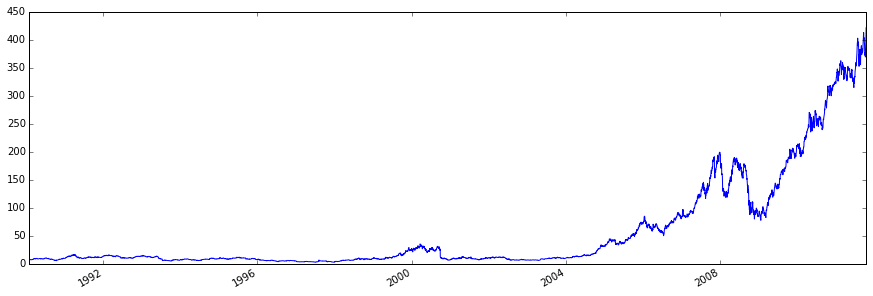

In [54]:
# Plots inline
import matplotlib.pyplot as plt
%matplotlib inline
# Plot Apple stock over time
stocks['AAPL'].plot(figsize = (15,5))
plt.show()

##### The `plot()` function extends naturally to an entire `Dataframe`!

In [55]:
# Specify a Dataframe of just 3 stocks to plot
three_stocks = stocks[['AAPL', 'MSFT', 'XOM']]
three_stocks.head(5)

,AAPL,MSFT,XOM
1990-02-01,7.86,0.51,6.12
1990-02-02,8.00,0.51,6.24
1990-02-05,8.18,0.51,6.25
1990-02-06,8.12,0.51,6.23
1990-02-07,7.77,0.51,6.33


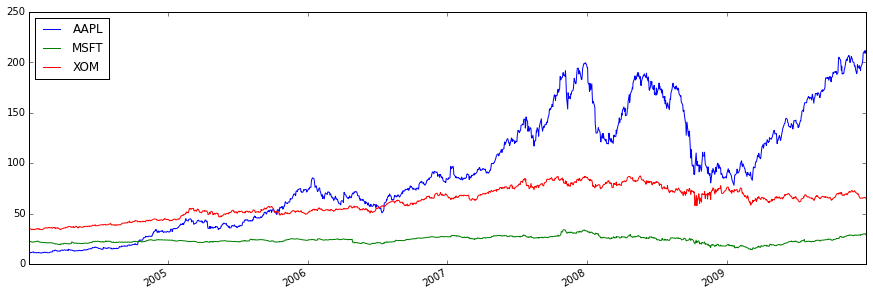

In [56]:
# Plot the 3 stocks from 2004 to 2009 with a legend in the upper left corner
three_stocks.ix['2004':'2009'].plot(figsize = (15,5))
plt.legend(loc = "upper left")

##### Look at how Pandas seamlessly handles the Time axis when you have a range of only 1 year below!

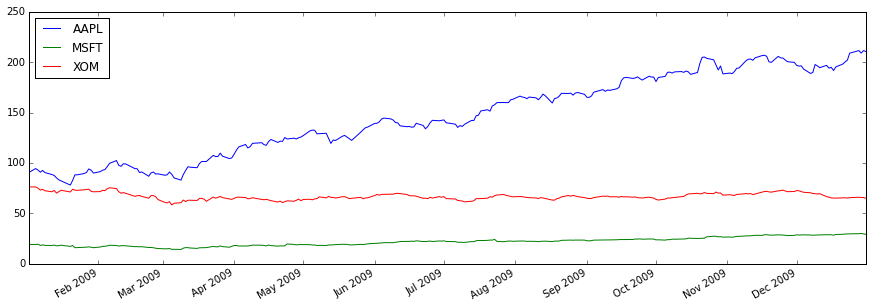

In [57]:
# Plot 3 stocks for 2009
three_stocks.ix['2009'].plot(figsize = (15,5))
plt.legend(loc = "upper left")

Let's use our favorite `resample()` method to plot our Apple stock ***quarterly***:

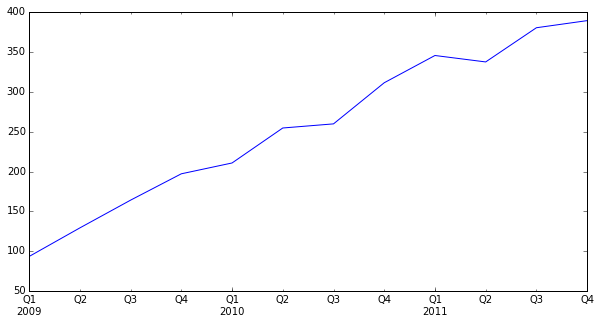

In [58]:
# Resample Apple quarterly and plot from 2009 on
apple_quarterly = stocks['AAPL'].resample('Q-DEC', fill_method = 'ffill')
apple_quarterly.ix['2009':].plot(figsize=(10, 5))

#### More Pandas Awesomeness - Moving Window Functions
There are all sorts of functions/quantities with stocks (and other data) that one might want to calculate based solely on a window of only the most recent `n` datapoints.  Pandas has a whole bunch of them prepackaged for you!
##### Available rolling or moving window functions:
- rolling_count: Returns number of non-NA observations in each trailing window. 
- rolling_sum: Moving window sum. 
- rolling_mean Moving window mean. 
- rolling_median: Moving window median. 
- rolling_var, rolling_std: Moving window variance and standard deviation, respectively. Uses n - 1 denominator. 
- rolling_skew, rolling_kurt: Moving window skewness (3rd moment) and kurtosis (4th moment), respectively.
- rolling_min, rolling_max: Moving window minimum and maximum. 
- rolling_quantile: Moving window score at percentile/ sample quantile. 
- rolling_corr, rolling_cov: Moving window correlation and covariance. 
- rolling_apply: Apply generic array function over a moving window. 
- ewma:  Exponentially-weighted moving average. 
- ewmvar, ewmstd: Exponentially-weighted moving variance and standard deviation. 
- ewmcorr, ewmcov: Exponentially-weighted moving correlation and covariance.

Let's take a look at a few of these in action!

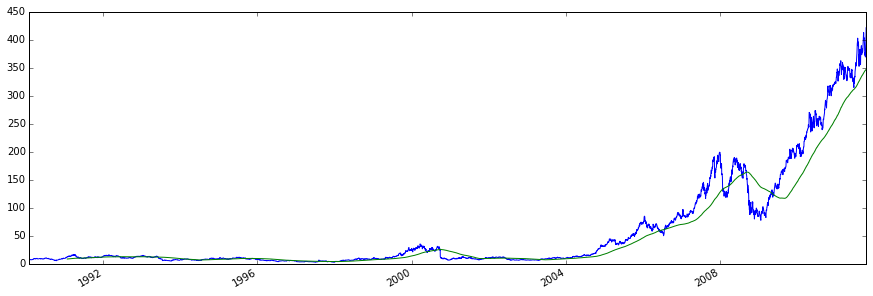

In [59]:
# Apple stock
apple = stocks['AAPL']
# Plot the stock over time
apple.plot()
# Overlay the rolling mean with a window of 250 datapoints
pd.rolling_mean(apple, window = 250).plot(figsize = (15,5))
plt.show()

Notice how the rolling mean sort of smoothly follows the exact data, this is a nice property to have.  Note the `window` parameter which specifies the size of the moving window.

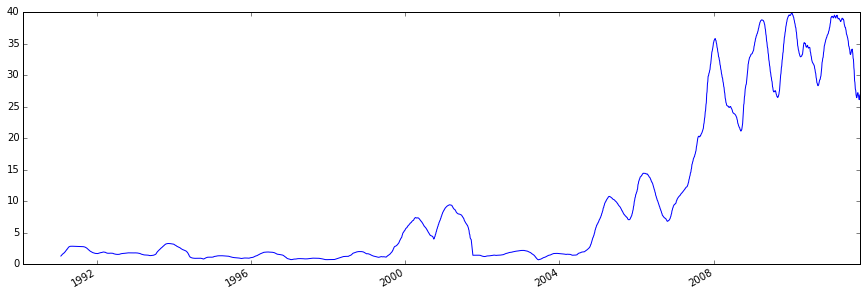

In [60]:
# Plot rolling standard deviation
pd.rolling_std(apple, window = 250).plot(figsize = (15,5))
plt.show()

##### Exponentialy Weighted Rolling Functions
What if we want to weight more recent datapoints more strongly within our window?  We can do this easily with ***Exponentially Weighted Functions***!

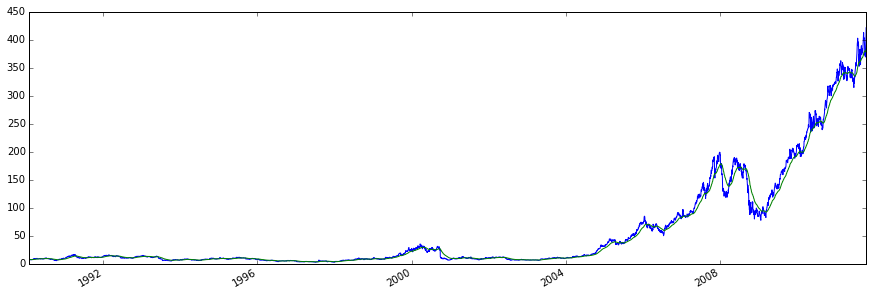

In [61]:
# Exponentially Weighted Moving Average
apple.plot()
pd.ewma(apple, span = 60).plot(figsize = (15,5))

To specify the decay factor you specify a span.  Exponentially weighted functions adapt much faster than equally weighted moving averages

##### Combining What We've Learned:
Let's use some of our handy shift operators to calculate the percentage change each day for the S&P, then we'll see that there's an easier way to do it with the `pct_change()` function.

In [62]:
#this is caculating the percent change, which is equal to time series/ time serie.shift(1) - 1
s_and_p_index = stocks['SPX']
print s_and_p_index.head()
print s_and_p_index.shift(1).head()
s_and_p_rets = s_and_p_index/s_and_p_index.shift(1) - 1
print s_and_p_rets.head()

1990-02-01    328.79
1990-02-02    330.92
1990-02-05    331.85
1990-02-06    329.66
1990-02-07    333.75
Name: SPX, dtype: float64
1990-02-01       NaN
1990-02-02    328.79
1990-02-05    330.92
1990-02-06    331.85
1990-02-07    329.66
Name: SPX, dtype: float64
1990-02-01         NaN
1990-02-02    0.006478
1990-02-05    0.002810
1990-02-06   -0.006599
1990-02-07    0.012407
Name: SPX, dtype: float64


In [63]:
# We can do the same thing for the other stocks just with the pct_change function
returns = stocks.pct_change()
print returns.head()

                  AA      AAPL        GE       IBM       JNJ  MSFT       PEP  \
1990-02-01       NaN       NaN       NaN       NaN       NaN   NaN       NaN   
1990-02-02  0.012048  0.017812  0.000000  0.005956  0.023419     0  0.008278   
1990-02-05  0.005952  0.022500  0.000000  0.025459 -0.006865     0 -0.006568   
1990-02-06 -0.011834 -0.007335  0.003484  0.013857 -0.004608     0  0.016529   
1990-02-07  0.005988 -0.043103  0.010417  0.021071  0.013889     0  0.003252   

                 SPX       XOM  
1990-02-01       NaN       NaN  
1990-02-02  0.006478  0.019608  
1990-02-05  0.002810  0.001603  
1990-02-06 -0.006599 -0.003200  
1990-02-07  0.012407  0.016051  


Let's try out the ***Rolling Correlation*** function to see how the returns on some stocks correlate with the S&P over time:

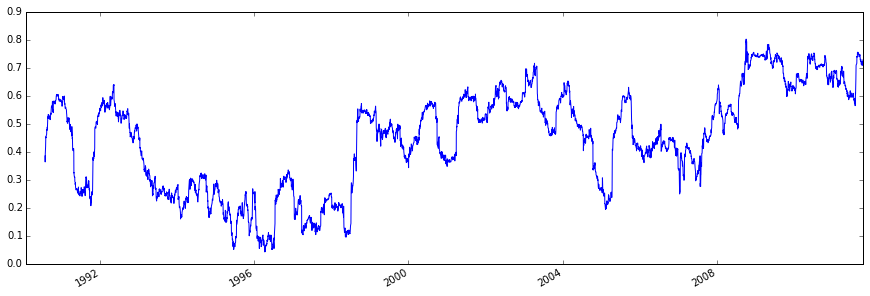

In [64]:
# For Apple
corr = pd.rolling_corr(returns.AAPL, s_and_p_rets, 125)
corr.plot(figsize = (15,5))

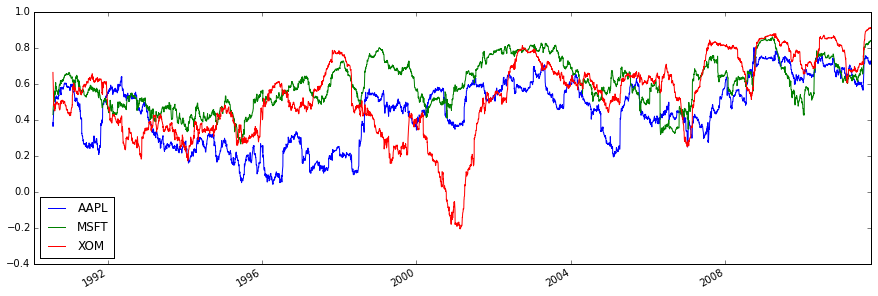

In [65]:
# For 3 stocks, works just as well with a Dataframe
returns = three_stocks.pct_change()
corr = pd.rolling_corr(returns, s_and_p_rets, 125)
corr.plot(figsize = (15,5))

#### Bottom Line:
Pandas is awesome.  A more detailed exploration of Financial and Economic Data Applications can be found in Python for Data Analysis by Wes McKinney

## Example of Time Series Modeling - Building an AR Model

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from random import choice
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

#### Going to use Ebola Deaths as an example

In [66]:
df = pd.DataFrame.from_csv('https://raw.githubusercontent.com/cmrivers/ebola/master/country_timeseries.csv',\
                           index_col=0)

In [68]:
df.columns

Index([u'Day', u'Cases_Guinea', u'Cases_Liberia', u'Cases_SierraLeone',
       u'Cases_Nigeria', u'Cases_Senegal', u'Cases_UnitedStates',
       u'Cases_Spain', u'Cases_Mali', u'Deaths_Guinea', u'Deaths_Liberia',
       u'Deaths_SierraLeone', u'Deaths_Nigeria', u'Deaths_Senegal',
       u'Deaths_UnitedStates', u'Deaths_Spain', u'Deaths_Mali'],
      dtype='object')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2015-01-05 to 2014-03-22
Data columns (total 17 columns):
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: float64(16), int64(1)
memory usage: 17.2 KB


##### We need to impute missing data values, in order to preserve as much of the time series as possible

##### Look at "both" ends of this data

In [70]:
deathColList = ["Deaths_Guinea", "Deaths_Liberia", "Deaths_SierraLeone"]

df.sort("Day", ascending=False)[deathColList][1:2]

/Users/pburkard88/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone
Date,,,
2015-01-04,1781,NaN,2943


In [71]:
df.sort("Day", ascending=True)[deathColList][1:2]

/Users/pburkard88/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone
Date,,,
2014-03-24,59,NaN,NaN


##### Use both a backfill AND a forward fill in order to fill all the NAs. 

In [72]:
# bfill

# ffill


In [73]:
# Take a look with info

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2015-01-05 to 2014-03-22
Data columns (total 17 columns):
Day                    122 non-null int64
Cases_Guinea           122 non-null float64
Cases_Liberia          122 non-null float64
Cases_SierraLeone      122 non-null float64
Cases_Nigeria          122 non-null float64
Cases_Senegal          122 non-null float64
Cases_UnitedStates     122 non-null float64
Cases_Spain            122 non-null float64
Cases_Mali             122 non-null float64
Deaths_Guinea          122 non-null float64
Deaths_Liberia         122 non-null float64
Deaths_SierraLeone     122 non-null float64
Deaths_Nigeria         122 non-null float64
Deaths_Senegal         122 non-null float64
Deaths_UnitedStates    122 non-null float64
Deaths_Spain           122 non-null float64
Deaths_Mali            122 non-null float64
dtypes: float64(16), int64(1)
memory usage: 17.2 KB


In [74]:
df1.sort("Day", ascending=False)[deathColList][1:2]

/Users/pburkard88/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone
Date,,,
2015-01-04,1781,3496,2943


In [75]:
df1.sort("Day", ascending=True)[deathColList][1:2]

/Users/pburkard88/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone
Date,,,
2014-03-24,59,6,5


In [76]:
deaths_df = df1[deathColList]

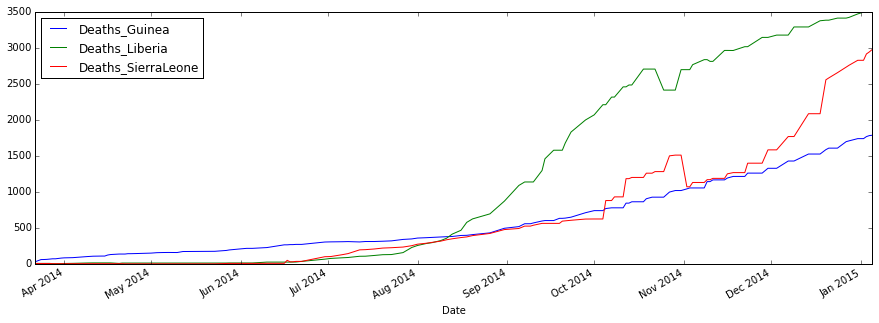

In [77]:
deaths_df.plot(figsize=(15,5))

## Auto-regressive Modelling

- time series x[t-5], x[t-4], x[t-3], x[t-2], x[t-1], x[t], y
- y is the first future point, we are trying to predict y
- build a model to predict the current values 
- x[t] =  theta0 + theta1 * x[t-1] + theta2 * x[t-2] + theta3 * x[t-3]
- x[t-1] = theta0 + theta1 * x[t -2] + theta2 * [t-3] + theta3 * x[t-4]
- etc etc...utilizing past data
- Then use the parameters theta to predict y, using y = theta0 + theta1 * x[t] + theta2 * x[t-1] + theta3 * x[t-2]

- The following cell illustrates basic time series modelling
- It's a good start to get your head round what's going on, in terms of lagging columns
- The data has only a single column
- You lag this column by 1 time value to create a new column
- Your Auto-regressive model size determines how many lagged columns you create
- Then you build your model using the *rows* of all the lagged columns

Now that we have the Ebola data, let's walk through an example of Autoregressive Modeling with it.

First select out only the first column (Guinea) and let's work with that one only for now:

In [78]:
#For example purposes just try and predict the deaths for the first country in the column list
#So the data just has a single column of data
# Select out the first column

#For convenience call this time series variable y


Date
2015-01-05    1786
2015-01-04    1781
Name: Deaths_Guinea, dtype: float64

First create a parameter to specify the size of your autoregressive model (the number of recent datapoints you want to keep as features).  It should just be a number, call it **`ar_size`** and try 4 first.

In [79]:
#ar_size represents the size of your Auto-regressive model
#so if your model size is 4 then use x1 (at time t-4), x2 (at time t-3), x3 (at time t-2), x4 (at time t-1)
#to predict x5 (the current value)


Now here's where the only new stuff comes in.  We need to create ***lagged columns*** to add to our dataframe.  

##### Why?  
Because these previous datapoints will now become our features.

##### How Many?
We should create **`ar_size`** of these columns for our **`ar_size`** features.

Do this now by shifting your original column forward (1 for feature 1, 2 for feature 2, 3 for feature 3...ar_size for feature ar_size) with the `shift()` function.  Call your features (columns), **DG_lag1**, **DG_lag2**, etc.  Use `pd.concat()` to combine the columns into one new dataframe called **`lagged`**.

In [1]:
# Create the lagged columns and add them to the dataframe

# Rename the columns

# Take a look at lagged


##### Generate Train/Test Sets
For now let's use the first half of the data to train on and the 2nd half for test.  This is not ideal--you really want to use a fixed size moving window to train on as your time series progresses.  However, this is not a bad place to start!

Generate a variable `X_train` that is the first half of the `lagged` dataframe (make sure to start with `ar_size`!).  Generate `y_train` similarly from the previously defined `y` `Series`.  Take a look at each.

Do the analogous thing for `X_test` and `y_test`.

In [84]:
#The training set will consist of all the lagged columns and the first half of the rows

# Generate X_train

# Generate y_train


            DG_lag1  DG_lag2  DG_lag3  DG_lag4
Date                                          
2014-12-31     1739     1767     1781     1786
2014-12-28     1739     1739     1767     1781
2014-12-27     1708     1739     1739     1767
2014-12-24     1697     1708     1739     1739
2014-12-21     1607     1697     1708     1739
Date
2014-12-31    1739
2014-12-28    1708
2014-12-27    1697
2014-12-24    1607
2014-12-21    1607
Name: Deaths_Guinea, dtype: float64


#### Fit Your AR Model
Now that we have appropriate Train/Test sets, we're at a very familiar point.  Simply build a `LinearRegression` model with the training set (with sklearn) and see how it performs against the test set!

In [87]:
#Now fit your model    

    
#Now use the model to predict the second half of the data
# Use mean squared error as your metric



------------------------------------
Predicted        Actual       Error
     391.83      396.00        4.17
     382.28      394.00       11.72
     374.53      380.00        5.47
     364.55      377.00       12.45
     356.11      373.00       16.89
     354.17      367.00       12.83
     348.03      363.00       14.97
     343.33      358.00       14.67
     339.08      346.00        6.92
     329.73      339.00        9.27
     320.68      319.00        1.68
     306.85      314.00        7.15
     295.13      310.00       14.87
     292.72      310.00       17.28
     289.95      304.00       14.05
     286.46      309.00       22.54
     286.53      307.00       20.47
     288.32      305.00       16.68
     285.04      303.00       17.96
     283.68      270.00       13.68
     263.08      270.00        6.92
     248.92      267.00       18.08
     251.50      267.00       15.50
     247.35      264.00       16.65
     245.96      264.00       18.04
     244.40      226.00    

#### A Better Approach - Use a moving window
See if you can set up your modeling so it retrains with every new observation on the previous n observations (rather than the static first half last half split.  Choose your window size, and go for it!

------------------------------------
Predicted        Actual       Error
     396.22      396.00        0.22
     386.15      394.00        7.85
     376.97      380.00        3.03
     367.34      377.00        9.66
     358.21      373.00       14.79
     357.52      367.00        9.48
     353.70      363.00        9.30
     348.31      358.00        9.69
     345.95      346.00        0.05
     334.36      339.00        4.64
     326.52      319.00        7.52
     309.35      314.00        4.65
     300.05      310.00        9.95
     295.34      310.00       14.66
     292.12      304.00       11.88
     286.90      309.00       22.10
     291.67      307.00       15.33
     291.43      305.00       13.57
     290.39      303.00       12.61
     290.46      270.00       20.46
     265.05      270.00        4.95
     264.43      267.00        2.57
     257.19      267.00        9.81
     256.39      264.00        7.61
     254.33      264.00        9.67
     255.22      226.00    

#### Takeaway:
AR Modeling is nothing new, we've just used some handy Pandas manipulations to extract new features from old datapoints to build our familiar Linear Regression model.